In [5]:
from google.colab import files
uploaded = files.upload()

Saving STAR WARS.csv to STAR WARS (1).csv


In [6]:
import pandas as pd
import numpy as np
STARWARS = pd.read_csv("STAR WARS.csv")
STARWARS = STARWARS[['character', 'dialogue']]
STARWARS["dialogue"] = STARWARS["dialogue"].astype(str)
STARWARS.head()

,character,dialogue
0,THREEPIO,Did you hear that? They've shut down the main...
1,THREEPIO,We're doomed!
2,THREEPIO,There'll be no escape for the Princess this time.
3,THREEPIO,What's that?
4,THREEPIO,I should have known better than to trust the l...


# Data Exploration 

In [7]:
import pandas as pd
STARWARS = pd.read_csv('STAR WARS.csv')


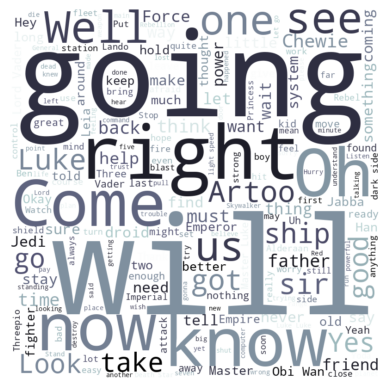

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
STARWARS['dialogue'] = STARWARS['dialogue'].astype(str)
# Combine all the preprocessed descriptions into a single string
all_text = ' '.join(STARWARS['dialogue'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='bone').generate(all_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#** Data Pre-processing**


In [9]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# **Lower Casing**

In [10]:
STARWARS["dialogue_lower"] = STARWARS["dialogue"].str.lower()
STARWARS.head()

,character,dialogue,dialogue_lower
0,THREEPIO,Did you hear that? They've shut down the main...,did you hear that? they've shut down the main...
1,THREEPIO,We're doomed!,we're doomed!
2,THREEPIO,There'll be no escape for the Princess this time.,there'll be no escape for the princess this time.
3,THREEPIO,What's that?,what's that?
4,THREEPIO,I should have known better than to trust the l...,i should have known better than to trust the l...


# **Removal of Punctuations**

In [11]:
#STARWARS.drop(["dialogue_lower"])
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
  '''custom function to remove the punctuation'''
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
STARWARS["dialogue_wo_punct"] = STARWARS["dialogue_lower"].apply(lambda text: remove_punctuation(text))
STARWARS.head()

,character,dialogue,dialogue_lower,dialogue_wo_punct
0,THREEPIO,Did you hear that? They've shut down the main...,did you hear that? they've shut down the main...,did you hear that theyve shut down the main r...
1,THREEPIO,We're doomed!,we're doomed!,were doomed
2,THREEPIO,There'll be no escape for the Princess this time.,there'll be no escape for the princess this time.,therell be no escape for the princess this time
3,THREEPIO,What's that?,what's that?,whats that
4,THREEPIO,I should have known better than to trust the l...,i should have known better than to trust the l...,i should have known better than to trust the l...


# **Removal of stopwords**

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [13]:
# Remove stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

STARWARS["dialogue_wo_stop"] = STARWARS['dialogue_wo_punct'].apply(lambda text: remove_stopwords(text))
STARWARS.head()

,character,dialogue,dialogue_lower,dialogue_wo_punct,dialogue_wo_stop
0,THREEPIO,Did you hear that? They've shut down the main...,did you hear that? they've shut down the main...,did you hear that theyve shut down the main r...,hear theyve shut main reactor well destroyed s...
1,THREEPIO,We're doomed!,we're doomed!,were doomed,doomed
2,THREEPIO,There'll be no escape for the Princess this time.,there'll be no escape for the princess this time.,therell be no escape for the princess this time,therell escape princess time
3,THREEPIO,What's that?,what's that?,whats that,whats
4,THREEPIO,I should have known better than to trust the l...,i should have known better than to trust the l...,i should have known better than to trust the l...,known better trust logic halfsized thermocapsu...


# **Removal of Frequent words**

In [14]:
from collections import Counter
cnt = Counter()
for content in STARWARS["dialogue_wo_stop"].values:
  for word in content.split():
    cnt[word] += 1
cnt.most_common(10)
 

[('dont', 180),
 ('im', 170),
 ('luke', 125),
 ('get', 123),
 ('well', 121),
 ('going', 121),
 ('right', 113),
 ('oh', 109),
 ('come', 108),
 ('know', 104)]

In [15]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(content):
  """custom function to remove the frequent words"""
  return " ".join([word for word in str(content).split() if word not in FREQWORDS])
STARWARS["dialogue_wo_stopfreq"] = STARWARS["dialogue_wo_stop"].apply(lambda content: remove_freqwords(content))
STARWARS.head()

,character,dialogue,dialogue_lower,dialogue_wo_punct,dialogue_wo_stop,dialogue_wo_stopfreq
0,THREEPIO,Did you hear that? They've shut down the main...,did you hear that? they've shut down the main...,did you hear that theyve shut down the main r...,hear theyve shut main reactor well destroyed s...,hear theyve shut main reactor destroyed sure m...
1,THREEPIO,We're doomed!,we're doomed!,were doomed,doomed,doomed
2,THREEPIO,There'll be no escape for the Princess this time.,there'll be no escape for the princess this time.,therell be no escape for the princess this time,therell escape princess time,therell escape princess time
3,THREEPIO,What's that?,what's that?,whats that,whats,whats
4,THREEPIO,I should have known better than to trust the l...,i should have known better than to trust the l...,i should have known better than to trust the l...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...


# **Removal of Rare words**

In [16]:
'''# Drop the two columns which are no more needed 
STARWARS.drop(["dialogue_wo_spchar", "dialogue_wo_stwrd"], axis=1, inplace=True)'''

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

STARWARS["dialogue_wo_stoprare"] = STARWARS["dialogue_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
STARWARS.head()

,character,dialogue,dialogue_lower,dialogue_wo_punct,dialogue_wo_stop,dialogue_wo_stopfreq,dialogue_wo_stoprare
0,THREEPIO,Did you hear that? They've shut down the main...,did you hear that? they've shut down the main...,did you hear that theyve shut down the main r...,hear theyve shut main reactor well destroyed s...,hear theyve shut main reactor destroyed sure m...,hear theyve shut main reactor destroyed sure m...
1,THREEPIO,We're doomed!,we're doomed!,were doomed,doomed,doomed,doomed
2,THREEPIO,There'll be no escape for the Princess this time.,there'll be no escape for the princess this time.,therell be no escape for the princess this time,therell escape princess time,therell escape princess time,therell escape princess time
3,THREEPIO,What's that?,what's that?,whats that,whats,whats,whats
4,THREEPIO,I should have known better than to trust the l...,i should have known better than to trust the l...,i should have known better than to trust the l...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...


# **Lemmatization**

In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

STARWARS["text_lemmatized"] = STARWARS["dialogue_wo_stoprare"].apply(lambda text: lemmatize_words(text))
STARWARS.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,character,dialogue,dialogue_lower,dialogue_wo_punct,dialogue_wo_stop,dialogue_wo_stopfreq,dialogue_wo_stoprare,text_lemmatized
0,THREEPIO,Did you hear that? They've shut down the main...,did you hear that? they've shut down the main...,did you hear that theyve shut down the main r...,hear theyve shut main reactor well destroyed s...,hear theyve shut main reactor destroyed sure m...,hear theyve shut main reactor destroyed sure m...,hear theyve shut main reactor destroyed sure m...
1,THREEPIO,We're doomed!,we're doomed!,were doomed,doomed,doomed,doomed,doomed
2,THREEPIO,There'll be no escape for the Princess this time.,there'll be no escape for the princess this time.,therell be no escape for the princess this time,therell escape princess time,therell escape princess time,therell escape princess time,therell escape princess time
3,THREEPIO,What's that?,what's that?,whats that,whats,whats,whats,whats
4,THREEPIO,I should have known better than to trust the l...,i should have known better than to trust the l...,i should have known better than to trust the l...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...


# **Data Analysis**

# **Sentiment Analysis**

In [18]:
from textblob import TextBlob
# apply sentiment analysis to text_lemmatized column
STARWARS['sentiment'] = STARWARS['text_lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
# output the results
STARWARS.head()

,character,dialogue,dialogue_lower,dialogue_wo_punct,dialogue_wo_stop,dialogue_wo_stopfreq,dialogue_wo_stoprare,text_lemmatized,sentiment
0,THREEPIO,Did you hear that? They've shut down the main...,did you hear that? they've shut down the main...,did you hear that theyve shut down the main r...,hear theyve shut main reactor well destroyed s...,hear theyve shut main reactor destroyed sure m...,hear theyve shut main reactor destroyed sure m...,hear theyve shut main reactor destroyed sure m...,0.333333
1,THREEPIO,We're doomed!,we're doomed!,were doomed,doomed,doomed,doomed,doomed,0.000000
2,THREEPIO,There'll be no escape for the Princess this time.,there'll be no escape for the princess this time.,therell be no escape for the princess this time,therell escape princess time,therell escape princess time,therell escape princess time,therell escape princess time,0.000000
3,THREEPIO,What's that?,what's that?,whats that,whats,whats,whats,whats,0.000000
4,THREEPIO,I should have known better than to trust the l...,i should have known better than to trust the l...,i should have known better than to trust the l...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...,0.500000


In [ ]:
# output the results
print(STARWARS[['text_lemmatized', 'sentiment']].head())

# **Topic Modeling**

In [19]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# Tokenize the text data
data = [simple_preprocess(text) for text in STARWARS["text_lemmatized"]]

# Create a dictionary from the data
dictionary = Dictionary(data)

# Convert the data into a bag-of-words format
corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

# Print the topics and their top words
for topic_id, topic in lda_model.print_topics(num_topics=10):
    print(f"Topic {topic_id}: {topic}")

Topic 0: 0.023*"hey" + 0.014*"yes" + 0.013*"artoo" + 0.013*"must" + 0.012*"thought" + 0.010*"leia" + 0.009*"rest" + 0.009*"look" + 0.008*"turned" + 0.008*"need"
Topic 1: 0.038*"go" + 0.023*"help" + 0.022*"take" + 0.017*"shield" + 0.016*"good" + 0.016*"let" + 0.015*"shuttle" + 0.014*"star" + 0.014*"point" + 0.014*"generator"
Topic 2: 0.026*"yes" + 0.016*"good" + 0.015*"shield" + 0.014*"side" + 0.014*"whoa" + 0.014*"leave" + 0.014*"sir" + 0.014*"go" + 0.012*"emperor" + 0.011*"grab"
Topic 3: 0.014*"thing" + 0.014*"ill" + 0.013*"work" + 0.013*"keep" + 0.011*"gonna" + 0.011*"hold" + 0.011*"got" + 0.010*"ship" + 0.010*"operational" + 0.009*"pull"
Topic 4: 0.024*"tell" + 0.016*"artoo" + 0.015*"moon" + 0.014*"lando" + 0.014*"told" + 0.011*"threepio" + 0.010*"somebody" + 0.010*"fighter" + 0.010*"back" + 0.009*"got"
Topic 5: 0.040*"chewie" + 0.025*"friend" + 0.016*"see" + 0.015*"alliance" + 0.015*"look" + 0.015*"fleet" + 0.014*"take" + 0.013*"freeze" + 0.013*"little" + 0.012*"nothing"
Topic 6: 0

# **Named Entity Recognition**

In [20]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
STARWARS['tokenized'] = STARWARS['text_lemmatized'].str.lower().apply(nltk.word_tokenize)
STARWARS.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,character,dialogue,dialogue_lower,dialogue_wo_punct,dialogue_wo_stop,dialogue_wo_stopfreq,dialogue_wo_stoprare,text_lemmatized,sentiment,tokenized
0,THREEPIO,Did you hear that? They've shut down the main...,did you hear that? they've shut down the main...,did you hear that theyve shut down the main r...,hear theyve shut main reactor well destroyed s...,hear theyve shut main reactor destroyed sure m...,hear theyve shut main reactor destroyed sure m...,hear theyve shut main reactor destroyed sure m...,0.333333,"[hear, theyve, shut, main, reactor, destroyed,..."
1,THREEPIO,We're doomed!,we're doomed!,were doomed,doomed,doomed,doomed,doomed,0.000000,[doomed]
2,THREEPIO,There'll be no escape for the Princess this time.,there'll be no escape for the princess this time.,therell be no escape for the princess this time,therell escape princess time,therell escape princess time,therell escape princess time,therell escape princess time,0.000000,"[therell, escape, princess, time]"
3,THREEPIO,What's that?,what's that?,whats that,whats,whats,whats,whats,0.000000,[whats]
4,THREEPIO,I should have known better than to trust the l...,i should have known better than to trust the l...,i should have known better than to trust the l...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...,known better trust logic halfsized thermocapsu...,0.500000,"[known, better, trust, logic, halfsized, therm..."


In [21]:
STARWARS['tagged'] = STARWARS['tokenized'].apply(nltk.pos_tag)
STARWARS[['tagged']].head()

,tagged
0,"[(hear, JJ), (theyve, NN), (shut, VBD), (main,..."
1,"[(doomed, VBN)]"
2,"[(therell, NN), (escape, NN), (princess, NN), ..."
3,"[(whats, NNS)]"
4,"[(known, VBN), (better, RBR), (trust, NN), (lo..."


In [22]:
STARWARS['nouns'] = STARWARS['tagged'].apply(lambda x: [word for word, tag in x if tag in ['NN', 'NNS', 'NNP', 'NNPS']])
STARWARS[['dialogue', 'nouns']].head()

,dialogue,nouns
0,Did you hear that? They've shut down the main...,"[theyve, reactor, madness]"
1,We're doomed!,[]
2,There'll be no escape for the Princess this time.,"[therell, escape, princess, time]"
3,What's that?,[whats]
4,I should have known better than to trust the l...,"[trust, dehousing, assister]"


In [23]:
STARWARS['verbs'] = STARWARS['tagged'].apply(lambda x: [word for word, tag in x if tag in ['VB']])

In [24]:
import csv
import nltk

# download the necessary nltk packages
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# load the CSV data file
with open('STAR WARS.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    # iterate through each row of the CSV file
    for row in reader:
        # get the text data from the row (assuming it's in the first column)
        text = row[0]
        # tokenize the text into sentences
        sentences = nltk.sent_tokenize(text)
        # iterate through each sentence
        for sentence in sentences:
            # tokenize the sentence into words and tag each word with its part of speech
            words = nltk.word_tokenize(sentence)
            pos_tags = nltk.pos_tag(words)
            # use the named entity chunker to identify named entities in the sentence
            chunked = nltk.ne_chunk(pos_tags)
            # iterate through each chunk in the sentence
            for chunk in chunked:
                # if the chunk is a named entity, print the entity type and text
                if hasattr(chunk, 'label') and chunk.label() == 'PERSON':
                    print('Person:', ' '.join(c[0] for c in chunk.leaves()))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [25]:
import spacy
import csv

# Load the pre-trained English language model
nlp = spacy.load("en_core_web_sm")

# Open the CSV data file for reading
with open('STAR WARS.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)

    # Iterate over each row in the CSV file
    for row in reader:
        text = row[0]  # Assuming the text data is in the first column of the CSV file

        # Process the text data with spaCy's named entity recognizer
        doc = nlp(text)

        # Print out the named entities found in the text data
        for entity in doc.ents:
            print(entity.text, entity.label_)


LUKE PERSON
TROOPER ORG
TROOPER ORG
CAPTAIN ORG
FIXER ORG
CAMIE ORG
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
DEAK ORG
LUKE PERSON
LUKE PERSON
LUKE PERSON
CAMIE ORG
FIXER ORG
SECOND ORDINAL
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
TROOPER ORG
TROOPER ORG
LUKE PERSON
OWEN ORG
OWEN ORG
OWEN ORG
OWEN ORG
OWEN ORG
LUKE PERSON
OWEN ORG
LUKE PERSON
LUKE PERSON
OWEN ORG
LUKE PERSON
OWEN ORG
LUKE PERSON
OWEN ORG
LUKE PERSON
OWEN ORG
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
LUKE PERSON
OWEN ORG
LUKE PERSON
LUKE PERSON
OWEN ORG
LUKE PERSON
OWEN ORG
LUKE PERSON
OWEN ORG
LUKE PERSON
OWEN ORG
LUKE PERSON
OWEN ORG
OWEN ORG
LUKE PERSON
OWE



```
# **`# This is formatted as code`**
```

# **Data Visualization**

## **word** **cloud** 

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [27]:
pip install tidytext 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 KB 7.3 MB/s eta 0:00:00
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3894 sha256=2dcbb6c394fab0acd6de8e90cd638759a6ef92a69fb56e09124e31a8771d77bd
  Stored in directory: /root/.cache/pip/wheels/2b/59/bb/6273dba5e106da0125567fcdec3d95752d66eb0c13d623a3bd
Successfully built tidytext


In [28]:
from tidytext import unnest_tokens
# Tokenize the text using the unnest_tokens function
tokens = unnest_tokens(STARWARS, input="text_lemmatized", output="word")
# Print the first 5 rows of the resulting dataframe
print(tokens.head(5))

  character                                           dialogue  \
0  THREEPIO  Did you hear that?  They've shut down the main...   
0  THREEPIO  Did you hear that?  They've shut down the main...   
0  THREEPIO  Did you hear that?  They've shut down the main...   
0  THREEPIO  Did you hear that?  They've shut down the main...   
0  THREEPIO  Did you hear that?  They've shut down the main...   

                                      dialogue_lower  \
0  did you hear that?  they've shut down the main...   
0  did you hear that?  they've shut down the main...   
0  did you hear that?  they've shut down the main...   
0  did you hear that?  they've shut down the main...   
0  did you hear that?  they've shut down the main...   

                                   dialogue_wo_punct  \
0  did you hear that  theyve shut down the main r...   
0  did you hear that  theyve shut down the main r...   
0  did you hear that  theyve shut down the main r...   
0  did you hear that  theyve shut down the

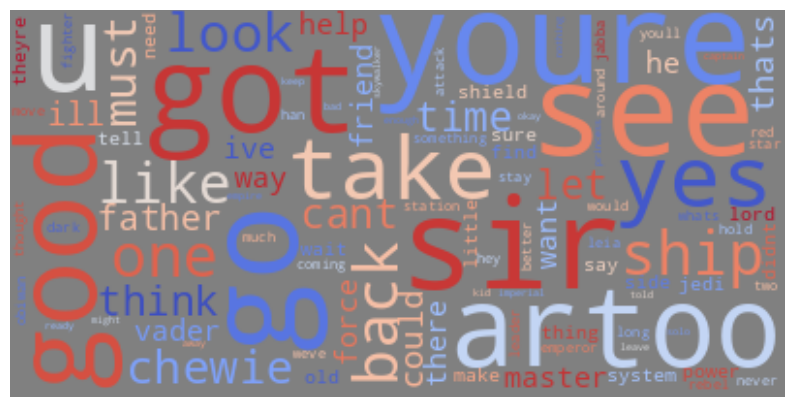

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Create a list of words from the tokens dataframe
words = list(tokens['word'])

# Create a dictionary of word frequencies
freq = dict(tokens.groupby('word')['word'].count())

# Generate the word cloud
wordcloud = WordCloud(background_color='gray', max_words=100, colormap='coolwarm', stopwords=STOPWORDS, collocations=False).generate_from_frequencies(freq)

# Create the image mask mask = np.array(Image.open("beth.jpg").resize((600, 600)))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Add the word cloud to the plot
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Add the image mask to the plot ax.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear', alpha=0.5)
ax.set_axis_off()

# Show the plot
plt.show()

## **Bar Charts**

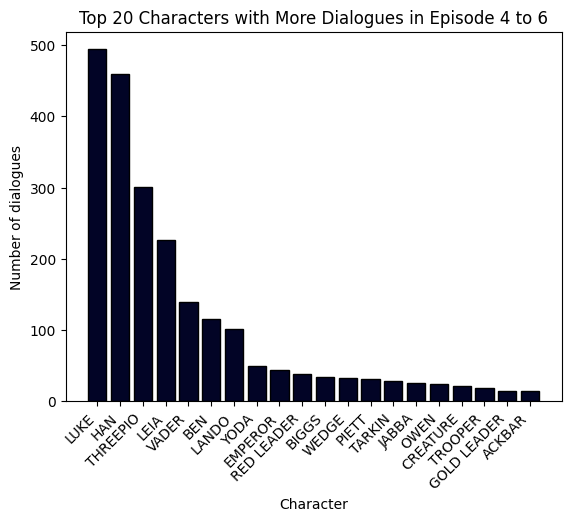

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# read data into a pandas DataFrame
ep4 = pd.read_csv("STAR WARS.csv")

# get top 20 characters with more dialogues
top_ep4_chars = ep4['character'].value_counts().nlargest(20)

# create a bar plot
plt.bar(top_ep4_chars.index, top_ep4_chars.values, color="#020426", edgecolor="black")

# customize plot
plt.xticks(rotation=45, ha='right')
plt.xlabel("Character")
plt.ylabel("Number of dialogues")
plt.title("Top 20 Characters with More Dialogues in Episode 4 to 6")

plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


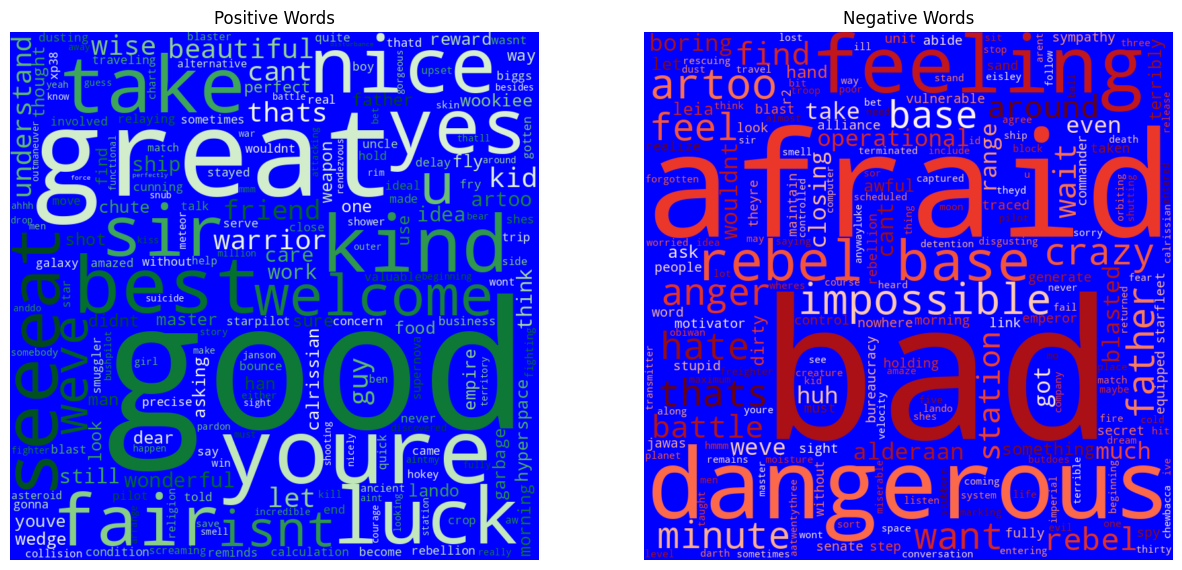

In [31]:
# Import necessary libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
nltk.download('vader_lexicon')
# Load the dataset

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores for each line of text

# Create separate dataframes for positive and negative lines
positive = STARWARS[STARWARS['sentiment'] > 0.5]
negative = STARWARS[STARWARS['sentiment'] < -0.5]

# Get the text for each set of lines
positive_text = ' '.join(positive['text_lemmatized'])
negative_text = ' '.join(negative['text_lemmatized'])

# Create word clouds for positive and negative words
positive_cloud = WordCloud(background_color='blue', width=800, height=800, colormap='Greens').generate(positive_text)
negative_cloud = WordCloud(background_color='blue', width=800, height=800, colormap='Reds').generate(negative_text)

# Display the word clouds
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.imshow(positive_cloud, interpolation='bilinear')
ax1.set_title('Positive Words')
ax1.axis('off')
ax2.imshow(negative_cloud, interpolation='bilinear')
ax2.set_title('Negative Words')
ax2.axis('off')
plt.show()

## ***Heat Map***

<Axes: >

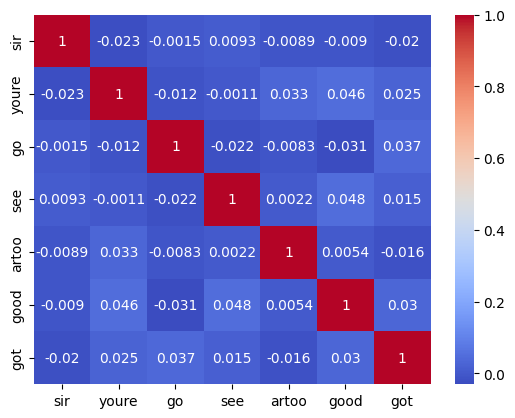

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the preprocessed "title" column of the dataset using the CountVectorizer object
text_lemmatized_matrix = vectorizer.fit_transform(STARWARS["text_lemmatized"])

# Convert the CountVectorizer output to a pandas DataFrame
text_lemmatized_df = pd.DataFrame(text_lemmatized_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Create a heatmap of the top 7 most frequent words in the preprocessed "title" column of the dataset
sns.heatmap(text_lemmatized_df.loc[:, text_lemmatized_df.sum().nlargest(7).index].corr(), cmap="coolwarm", annot=True)